In [1]:
import add_to_syspath
from audiomnist.io.read_dataset import load_alexnet_dataset
from audiomnist.models.autoencoder_spectrogram import build_model as build_model_autoencoder
from audiomnist.models.alexnet import build_model as build_model_alexnet
from audiomnist.train.autoencoder_spectrogram import get_epoch_checkpoint
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform
from lucid.modelzoo import vision_base

In [2]:
tf.enable_eager_execution()

In [8]:
dataset = load_alexnet_dataset("../tf_data/spectrogram.tfrecords")

In [9]:
model_autoencoder = build_model_autoencoder()
model_autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_autoencoder1 (Conv2D)   (None, 227, 227, 32)      320       
_________________________________________________________________
pool_autoencoder1 (MaxPoolin (None, 114, 114, 32)      0         
_________________________________________________________________
conv_autoencoder2 (Conv2D)   (None, 114, 114, 16)      4624      
_________________________________________________________________
pool_autoencoder2 (MaxPoolin (None, 57, 57, 16)        0         
_________________________________________________________________
conv_autoencoder3 (Conv2D)   (None, 57, 57, 8)         1160      
_________________________________________________________________
pool_autoencoder3 (MaxPoolin (None, 29, 29, 8)         0         
_________________________________________________________________
conv_autoencoder4 (Conv2D)   (None, 29, 29, 8)         584       
__________

In [10]:
ckpt = get_epoch_checkpoint("../models/autoencoder_spectrogram", 50)
model_autoencoder.load_weights(ckpt)

In [11]:
model_alexnet = build_model_alexnet()
model_alexnet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 55, 55, 96)        11712     
_________________________________________________________________
leaky_relu1 (LeakyReLU)      (None, 55, 55, 96)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2 (Conv2D)               (None, 23, 23, 256)       614656    
_________________________________________________________________
leaky_relu2 (LeakyReLU)      (None, 23, 23, 256)       0         
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 11, 11, 256)       0         
__________

In [12]:
ckpt = get_epoch_checkpoint("../models/alexnet",19)
model_alexnet.load_weights(ckpt)


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ffef908f828> and <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x7ffef908f710>).



Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ffef908f828> and <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x7ffef908f710>).



Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ffef908fa20> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ffef908f828>).



Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ffef908fa20> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ffef908f828>).



Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7ffef8f6f6d8> and <tensorflow.python.keras.layers.core.Flatten object at 0x7ffef8f6f470>).



Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7ffef8f6f6d8> and <tensorflow.python.keras.layers.core.Flatten object at 0x7ffef8f6f470>).



Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7ffef915c4e0> and <tensorflow.python.keras.layers.core.Dropout object at 0x7ffef8f45ef0>).



Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7ffef915c4e0> and <tensorflow.python.keras.layers.core.Dropout object at 0x7ffef8f45ef0>).



Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7ffef8eec3c8> and <tensorflow.python.keras.layers.core.Dropout object at 0x7ffef8f34160>).



Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7ffef8eec3c8> and <tensorflow.python.keras.layers.core.Dropout object at 0x7ffef8f34160>).


In [7]:
iterator = iter(dataset)

RuntimeError: dataset.__iter__() is only supported when eager execution is enabled.

In [ ]:
image = next(iterator)

In [ ]:
plt.imshow(np.array(image['data']).reshape((227,227)))

In [ ]:
image_encoded = model_autoencoder.predict(np.array(image['data']).reshape((1,227,227,1)))
plt.imshow(image_encoded.reshape((227,227)))

In [14]:
encoder_model = keras.Model(inputs=model_autoencoder.input,outputs=model_autoencoder.get_layer('conv_autoencoder4').output)

100.71969


(array([2677., 1382., 1386.,  460.,   66.,  124.,  200.,  154.,  199.,
          80.]),
 array([  0.      ,  10.071969,  20.143938,  30.215906,  40.287876,
         50.359844,  60.431812,  70.503784,  80.57575 ,  90.64772 ,
        100.71969 ], dtype=float32),
 <a list of 10 Patch objects>)

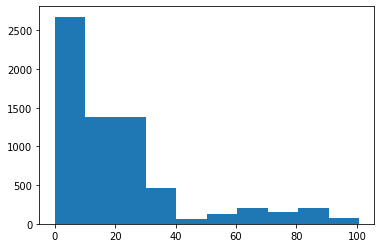

In [15]:
encoded_image = encoder_model.predict(np.array(image['data']).reshape((1,227,227,1)))
encoded_image = encoded_image.reshape((29*29*8))
print(max(encoded_image))
plt.hist(encoded_image)

In [13]:
inputs = keras.Input(shape=(29,29,8))
x = inputs

for i in range(7,len(model_autoencoder.layers)):
    x = model_autoencoder.layers[i](x)

for layer in model_alexnet.layers:
    x = layer(x)

complete_model = keras.Model(inputs=inputs,outputs=x)

In [14]:
complete_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 29, 29, 8)         0         
_________________________________________________________________
up_autoencoder1 (UpSampling2 (None, 58, 58, 8)         0         
_________________________________________________________________
conv_autoencoder5 (Conv2D)   (None, 58, 58, 16)        1168      
_________________________________________________________________
up_autoencoder2 (UpSampling2 (None, 116, 116, 16)      0         
_________________________________________________________________
conv_autoencoder6 (Conv2D)   (None, 116, 116, 32)      4640      
_________________________________________________________________
up_autoencoder3 (UpSampling2 (None, 232, 232, 32)      0         
_________________________________________________________________
conv_autoencoder7 (Conv2D)   (None, 232, 232, 1)       289       
__________

In [15]:
import json

complete_model.save('../models/decoder_alexnet/model.h5')

<module 'tensorflow._api.v1.keras.experimental' from '/workdir/2017duquesnej/miniconda3/envs/aud_interp/lib/python3.7/site-packages/tensorflow/_api/v1/keras/experimental/__init__.py'>


In [30]:
with K.get_session().as_default() as sess:
    writer = tf.summary.FileWriter("../logs/graphs/", tf.get_default_graph())


RuntimeError: tf.summary.FileWriter is not compatible with eager execution. Use tf.contrib.summary instead.